# Data Augmentation

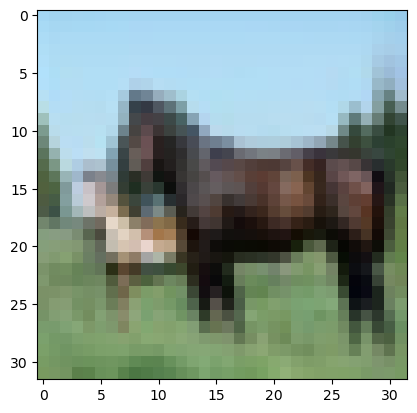

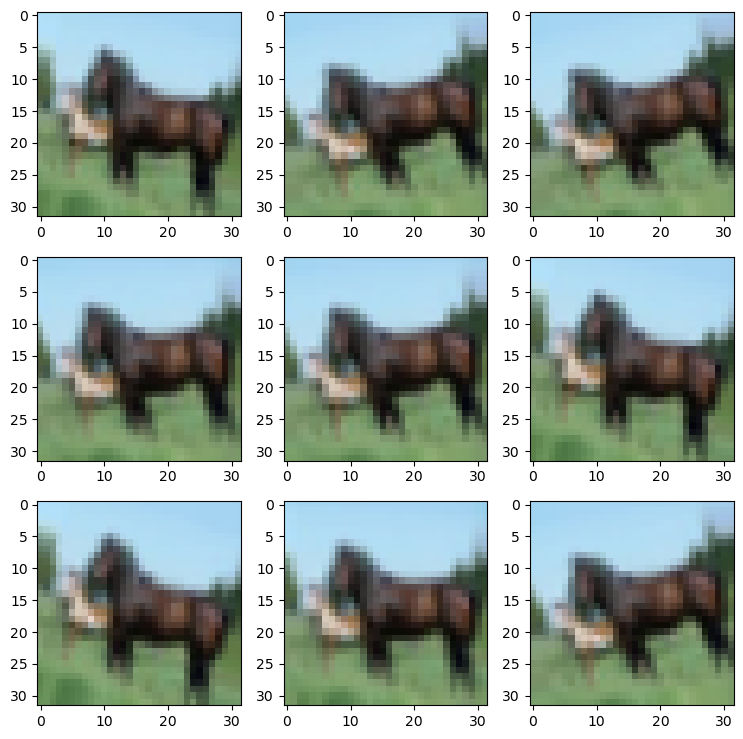

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import keras
from keras.datasets import cifar10
from keras.preprocessing.image import ImageDataGenerator

# Load the data
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

image = x_train[12]
plt.imshow(image)
plt.show()


def show_images(image, generator):
    channel, height, width = image.shape
    image = image.reshape(1, channel, height, width)
    gen = generator.flow(image, batch_size=1)

    plt.figure(figsize=(9, 9))
    for i in range(9):
        gen_image = gen.next()[0].astype(np.uint8)
        plt.subplot(3, 3, i+1)
        plt.imshow(gen_image)
    plt.show()

# Flip
generator = ImageDataGenerator(rotation_range=20)
show_images(image, generator)

## Various techniques to augment data

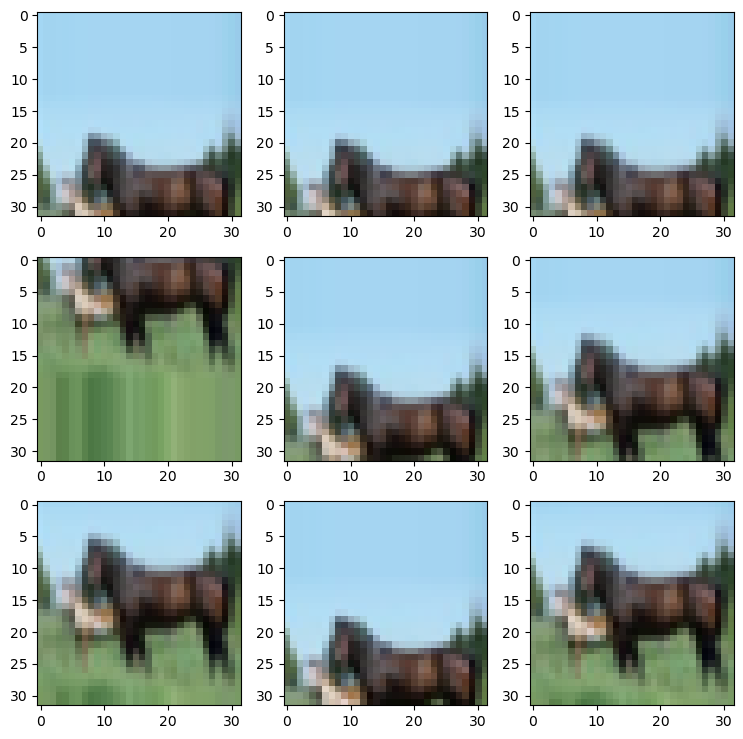

In [3]:
# width shift
generator = ImageDataGenerator(width_shift_range=0.5)
show_images(image, generator)

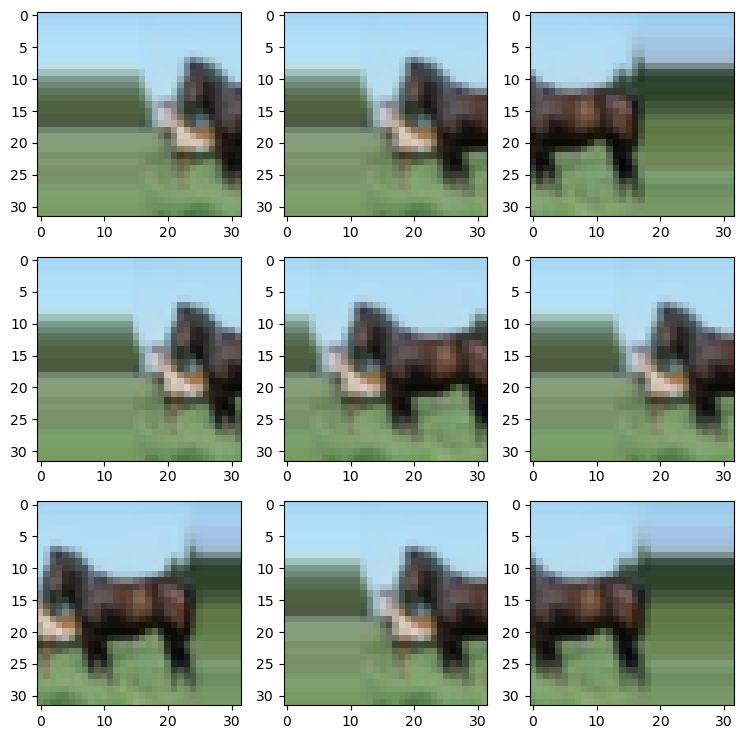

In [4]:
# height shift
generator = ImageDataGenerator(height_shift_range=0.5)
show_images(image, generator)

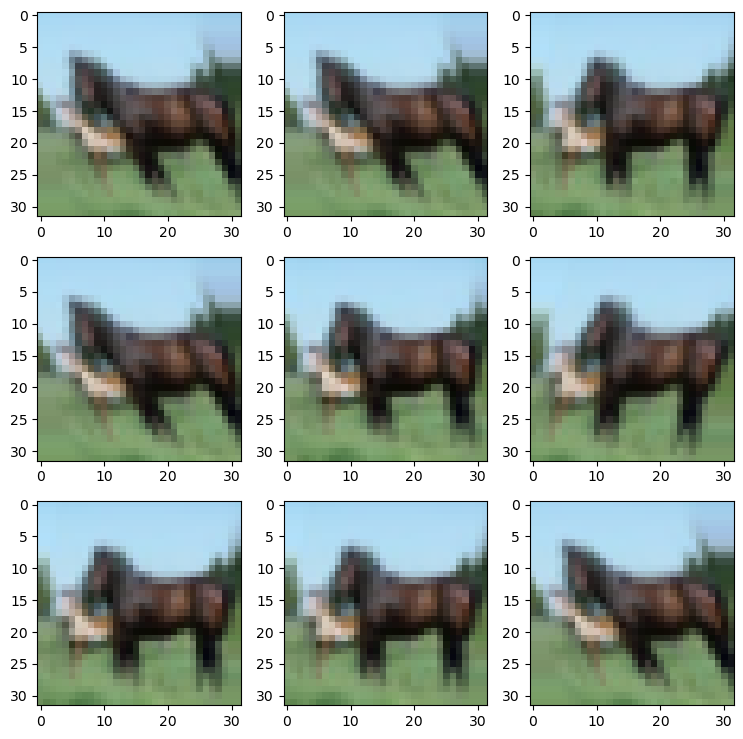

In [5]:
# shear shift
generator = ImageDataGenerator(shear_range=20)
show_images(image, generator)

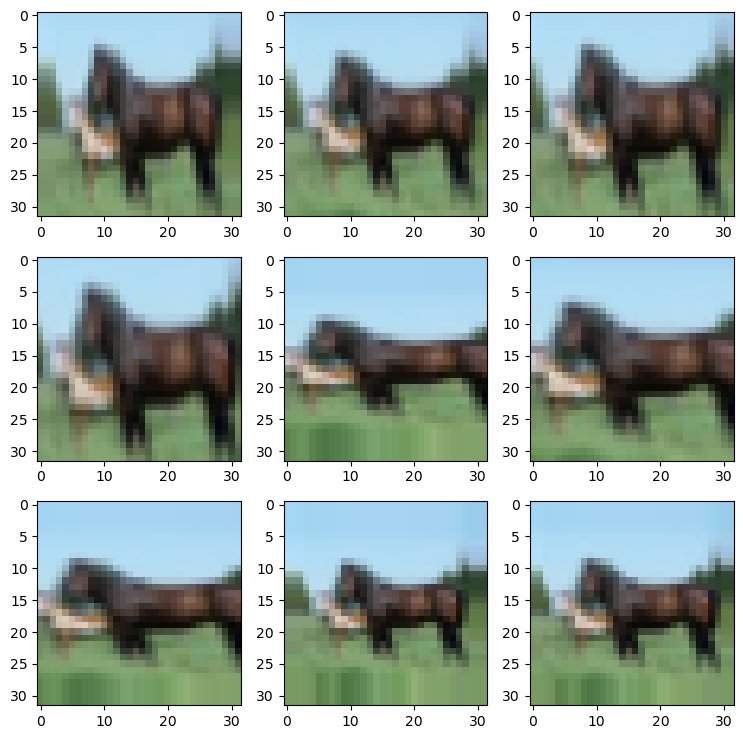

In [7]:
# zoom
generator = ImageDataGenerator(zoom_range=0.4)
show_images(image, generator)

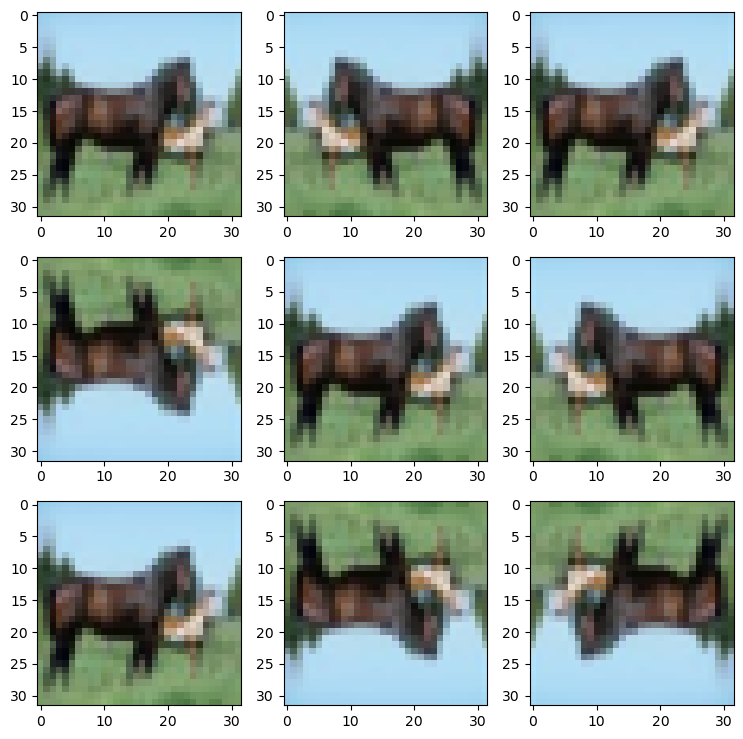

In [8]:
# horizontal and vertical flip
generator = ImageDataGenerator(horizontal_flip=True, vertical_flip=True)
show_images(image, generator)

## apply augmentation to CNN

### Build a CNN model

In [11]:
# Set the parameters
from keras.callbacks import EarlyStopping

early_stopping = EarlyStopping(patience=2)
batch_size = 32
num_classes = 10
epochs = 20

# Preprocess the data
from keras.utils import to_categorical
y_train = to_categorical(y_train, num_classes)
y_test = to_categorical(y_test, num_classes)

# Build the model
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D

model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3), padding='same' , activation='relu', input_shape=x_train.shape[1:]))
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, kernel_size=(3, 3), padding='same' , activation='relu'))
model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

model.compile(loss=keras.losses.categorical_crossentropy, optimizer=keras.optimizers.Adam(), metrics=['accuracy'])
model.summary()

2023-02-27 17:29:02.204675: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 32)        896       
                                                                 
 conv2d_1 (Conv2D)           (None, 30, 30, 32)        9248      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 15, 15, 32)       0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 15, 15, 64)        18496     
                                                                 
 conv2d_3 (Conv2D)           (None, 13, 13, 64)        36928     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 6, 6, 64)         0         
 2D)                                                    

## 

### Train the model with augmented data

In [ ]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

generator = ImageDataGenerator(rotation_range=20, width_shift_range=0.2, height_shift_range=0.2, shear_range=20, zoom_range=0.2, horizontal_flip=True, vertical_flip=True)
generator.fit(x_train)

### Visualize the training process

In [ ]:
import matplotlib.pyplot as plt

# Plot the loss and accuracy curves for training and validation
train_loss = history.history['loss']
val_loss = history.history['val_loss']
train_acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

plt.plot(np.arange(len(train_loss)), train_loss, label='train_loss')
plt.plot(np.arange(len(val_loss)), val_loss, label='val_loss')
plt.legend()
plt.show()

plt.plot(np.arange(len(train_acc)), train_acc, label='train_accuracy')
plt.plot(np.arange(len(val_acc)), val_acc, label='val_accuracy')
plt.legend()
plt.show()

### Evaluate the model

In [ ]:
loss, acc = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', loss)
print('Test accuracy:', acc)

### Predict the test data

In [ ]:
n_imgae = 25
rand_idx = np.random.randint(0, len(x_test), n_imgae)

y_rand = model.predict(x_test[rand_idx])
predicted_classes = np.argmax(y_rand, axis=1)

cifar10_labels = np.array(['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck'])

plt.figure(figsize=(10, 10)) # Set the figure size
for i in range(n_imgae):
    cifar_image = plt.subplot(5, 5, i+1)
    plt.imshow(x_test[rand_idx[i]])
    plt.title(cifar10_labels[predicted_classes[i]])
    plt.tick_params(bottom=False, left=False, labelbottom=False, labelleft=False)
plt.show()

### Save the model

In [ ]:
from keras.models import load_model

model.save('cifar10_model_with_agumetation.h5')